In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import os

### Functions

In [3]:
def plot_dendrogram(model, ax, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, ax=ax, **kwargs)


# Calculates the sum of distances in a list, returning the sum and the list
# size
def big_d_r (list):
    sum = 0.0
    for i in list:
        for j in list:
            sum += abs(i - j)
    return sum, len(list)

### Getting Data

In [4]:
# reading file and getting data

with open("../test.txt", "r") as file:
    lines = file.readlines()
    lines = [i.strip("[]\n") for i in lines]
    lines = [i.split(", ") for i in lines]
    lines = [np.array(i, dtype="float64") for i in lines]

with open("matrices.txt", "r") as file:
    matrices_lines = file.readlines()
    to_be_removed = "]["
    for i, string in enumerate(matrices_lines):
        for char in to_be_removed:
            string = string.replace(char, "")
        matrices_lines[i] = string
    matrices_lines = [i.split("\n") for i in matrices_lines]
    for i, matrices_class in enumerate(matrices_lines):
        matrices_lines[i] = [iter.split(", ") for iter in matrices_class]
    for i, j in enumerate(matrices_lines):
        matrices_lines[i] = matrices_lines[i][0]
    
#formatting individual matrices
#for i, line in enumerate(matrices_lines):
#    for j, matrix in enumerate(line):
#        matrix = matrix.split("; ")
#        matrix = np.array([iter.split(" ") for iter in matrix], dtype='int16')
#        line[j] = matrix
#    matrices_lines[i] = line

print(matrices_lines[0])
#for i in matrices_lines:
#    print(i)


['0 0 0; 0 0 0; 0 0 0']


### not so useful tests

In [ ]:

# interating over diffent quantities of groups
for i, recurrence_class in enumerate(lines[1:-1]):
    for number_of_groups in range(2, 9):
        try:
            os.mkdir(f"randomTest/class{i+1}")
        except:
            print(f"Directory class{i+1} already exists", end='\r', flush=True)



        # Setting general graph properties
        fig, axes = plt.subplots(4, 1, figsize=(10, 20), constrained_layout=True)
        fig.suptitle(f"Cluster Dendrogram for Class {i+1}")

        for linkage_type, ax in zip(["single", "complete", "average", "ward"], axes):

            clustering = AgglomerativeClustering(n_clusters=number_of_groups,
                                                distance_threshold=None,
                                                linkage=linkage_type,
                                                compute_distances=True,
                                                compute_full_tree=True)
            model = clustering.fit(recurrence_class.reshape(-1, 1))

            # plot the dendrograms
            ax.set_xlabel("Matrix number")
            ax.set_ylabel("\"Proximity\"")
            #plot_dendrogram(model, ax, truncate_mode="level", p=7)
            plot_dendrogram(model, ax, color_threshold=100)
            ax.set_ylim(0, 30)
            ax.set_title(f"Linkage: {linkage_type}")

        fig.savefig(f"randomTest/class{i+1}/n3test.class{i+1}.{number_of_groups:02d}groups.jpg", dpi=150)
        plt.close(fig)

In [23]:
color_threshold = 100
linkage_type = "complete"
number_of_groups = 3
class_number = 3
recurrence_class = lines[class_number]

clustering = AgglomerativeClustering(n_clusters=number_of_groups,
                                      distance_threshold=None,
                                      linkage=linkage_type,
                                      compute_distances=True,
                                      compute_full_tree=True)
model = clustering.fit(recurrence_class.reshape(-1, 1))

#fig, ax = plt.subplots(1, 1, figsize=(15, 7))
#plot_dendrogram(model, ax, color_threshold=color_threshold)
#ax.set_ylim((0, 150))
#ax.axhline(color_threshold, c='black')
#fig.savefig('test.svg')

matrices_by_labels = [[] for i in range(number_of_groups)]
for i, j in zip(model.labels_, matrices_lines[class_number]):
    matrices_by_labels[i].append(j)

lines_by_labels = [[] for i in range(number_of_groups)]
for i, j in zip(model.labels_, lines[class_number]):
    lines_by_labels[i].append(j)

# calculating big_w_k
w = 0.0
for i in lines_by_labels:
    print(big_d_r(i))
    sum, sum_size = big_d_r(i)
    w += sum / (2 * sum_size)

(1842.0, 6)
(43804.0, 42)
(33846.0, 36)


1145.0595238095239

In [16]:
#for i, j in enumerate(matrices_by_labels):
#    print(f"label: {i}")
#    for k in j:
#        print(k)
#    print("\n\n")
#    #print(f"{i}:\n{j}\n\n")

for i, j in enumerate(lines_by_labels):
    print(f"label: {i}")
    for k in j:
        print(k)
    print("\n\n")

label: 0
1232.0
1166.0
1197.0
1152.0
1089.0
1133.0



label: 1
61.0
43.0
55.0
72.0
75.0
52.0
39.0
67.0
42.0
65.0
70.0
53.0
57.0
36.0
136.0
59.0
116.0
64.0
53.0
45.0
119.0
81.0
107.0
68.0
53.0
68.0
56.0
50.0
56.0
43.0
108.0
131.0
85.0
58.0
70.0
62.0
49.0
62.0
82.0
68.0
63.0
57.0



label: 2
292.0
291.0
286.0
258.0
291.0
235.0
228.0
270.0
221.0
284.0
291.0
265.0
271.0
286.0
219.0
271.0
276.0
209.0
259.0
276.0
242.0
264.0
246.0
245.0
227.0
242.0
249.0
248.0
252.0
268.0
270.0
220.0
243.0
257.0
243.0
248.0





For class 2, it seems that 2 groups are to be expected.

For class 3, 3 groups

In [ ]:
np.shape(matrices_lines[3])

In [ ]:
print(dir(model))

### Tests for finding clusters

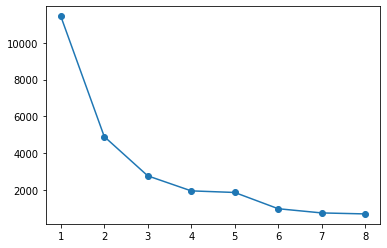

In [16]:
color_threshold = 100
linkage_type = "complete"
#number_of_groups = 3
class_number = 4
recurrence_class = lines[class_number]
group_range = range(1, 9)

w_list = []
for number_of_groups in group_range:
    clustering = AgglomerativeClustering(n_clusters=number_of_groups,
                                        distance_threshold=None,
                                        linkage=linkage_type,
                                        compute_distances=True,
                                        compute_full_tree=True)
    model = clustering.fit(recurrence_class.reshape(-1, 1))
    
    #fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    #plot_dendrogram(model, ax, color_threshold=color_threshold)
    #ax.set_ylim((0, 150))
    #ax.axhline(color_threshold, c='black')
    #fig.savefig('test.svg')
    
    matrices_by_labels = [[] for i in range(number_of_groups)]
    for i, j in zip(model.labels_, matrices_lines[class_number]):
        matrices_by_labels[i].append(j)
    
    lines_by_labels = [[] for i in range(number_of_groups)]
    for i, j in zip(model.labels_, lines[class_number]):
        lines_by_labels[i].append(j)
    
    # calculating big_w_k
    w = 0.0
    for i in lines_by_labels:
        sum, sum_size = big_d_r(i)
        w += sum / (2 * sum_size)
    
    w_list.append(w)
fig, ax = plt.subplots(1, 1)

ax.plot(group_range, w_list)
ax.scatter(group_range, w_list)
ax.set_xticks(group_range);

The number of groups seems to be:


    class   :   0   1   2   3   4   5   6   7   8   9
    groups  :   1   1   2   3   4   4   3   2   1   1

#### Possible Gaussian?

Text(0.5, -0.01, 'Class')

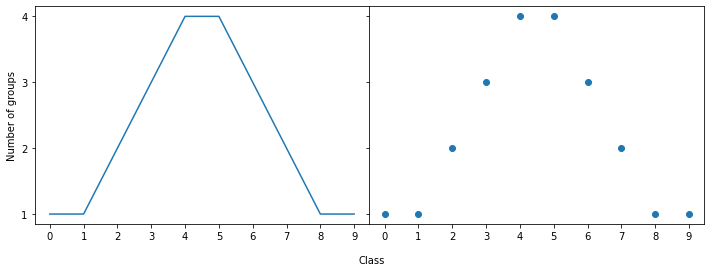

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

ax[0].plot(range(9+1), [1, 1, 2, 3, 4, 4, 3, 2, 1, 1])
ax[1].scatter(range(9+1), [1, 1, 2, 3, 4, 4, 3, 2, 1, 1])

ax[0].set_yticks(range(1, 5))
ax[0].set_xticks(range(0, 10))
ax[0].set_ylabel("Number of groups")

fig.subplots_adjust(wspace=0, hspace=0)
fig.text(0.5, -0.01, "Class")

2.7017988958213612 0.0


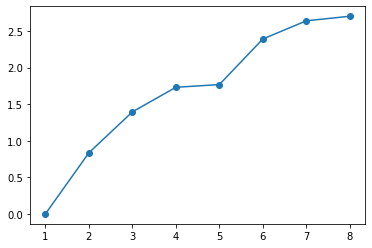

In [18]:
#finding maximum value of ocurrences
maximum = 0
for i in lines:
    if maximum < max(i):
        maximum = max(i)


# getting a reference distribution to be used in gap statistic
reference_distribution = np.random.randint(0, maximum, size=100000)


# getting other big_b w_list(s) from samples of size len(recurrence_class)
big_b = 20
random_w_list = []
for i in range(big_b):
    random_index = np.random.randint(0, 100000, size=len(recurrence_class))
    random_class = reference_distribution[random_index]

    w_list_ = []
    for number_of_groups in group_range:
        clustering = AgglomerativeClustering(n_clusters=number_of_groups,
                                            distance_threshold=None,
                                            linkage=linkage_type,
                                            compute_distances=True,
                                            compute_full_tree=True)
        model = clustering.fit(random_class.reshape(-1, 1))
                        
        lines_by_labels_ = [[] for i in range(number_of_groups)]
        for i, j in zip(model.labels_, lines[class_number]):
            lines_by_labels_[i].append(j)
        
        # calculating big_w_k
        w = 0.0
        for i in lines_by_labels_:
            sum, sum_size = big_d_r(i)
            w += sum / (2 * sum_size)
        
        w_list_.append(w)
    
    random_w_list.append(w_list_)


# calculating average w from random_w_list
random_w_list = np.array(random_w_list)
average_random_w_list = []
for i in range(len(w_list)):
    average_random_w_list.append(np.sum(random_w_list[:, i]) / big_b)
    


gap = np.log(average_random_w_list) - np.log(w_list)

for i, j in zip(gap, np.roll(gap, -1)):
    if i >= j:
        print(i, j)
        break

fig, ax = plt.subplots(1, 1)

ax.plot(group_range, gap)
ax.scatter(group_range, gap)

In [19]:
np.log(w_list)

array([9.34411757, 8.49880986, 7.9312964 , 7.58552686, 7.5405203 ,
       6.9099642 , 6.65217872, 6.58030004])